# Final project - Online Education System Data
___________

# Group #6

### Members:

   * Moshe Alkobi

   * Aviv Erez

   * Itamar Hoshen

   * Yohay Mabari

__________________

#### Link: https://www.kaggle.com/datasets/sujaradha/online-education-system-review


![Alt str](https://penntoday.upenn.edu/sites/default/files/2021-06/covid-education-teaser-social.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# Introduction 

#### As the pandemic has forced us into online education, this data collection aims to analyze the impact of online education. To check out the satisfactory level of the learners, review was conducted.

In [2]:
url = 'https://raw.githubusercontent.com/IHoshen/Data-analysis-project/main/ONLINE%20EDUCATION%20SYSTEM%20REVIEW.csv'
data = pd.read_csv(url)
data.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


# observation 1:

##### After we read the data they checked it. we wanted to see is the data clean.

In [3]:
data.isnull().sum()

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

##### As you can see after we use `.isnull` commend we our data is clean!






![Alt Text](https://media.giphy.com/media/NXp9HM6YeuS0U/giphy.gif)

#### In the next step, we focused on the data of the students in order to test the efficiency of online learning : 

In [4]:
data= data.dropna(subset = ['Level of Education'])
data1 = data[(data['Level of Education'] != "School")]
data1.reset_index()

,index,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
942,1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
943,1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
944,1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,...,2,Yes,No,No,61-70,3,3,Both,6,Good


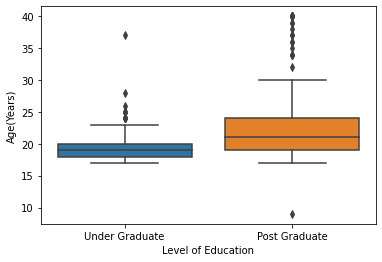

In [5]:
sns.boxplot(x='Level of Education', y='Age(Years)', data=data1);

##### Because the data in the `data['Home Location']` column is `str` we used `.get_dummies` method to swich the `str` in the column to `int` 

In [6]:
rural_urban = pd.get_dummies(data['Home Location'])
rural_urban

,Rural,Urban
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1028,1,0
1029,1,0
1030,1,0
1031,1,0


In [7]:
data1 = pd.concat([data1,rural_urban],axis = 1)
#del data['Urban']
data.iloc[:,:]

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good


##### we use `.concat` to conect the 2 DataFrames together

In [8]:
data1['Rural'].sum()

354

In [9]:
data1['Urban'].sum()

679

##### Now we have summed up the results so that we can turn the amount into percentages

In [10]:
Urban_and_Rural = data1['Rural'].sum() + data1['Urban'].sum()
Urban_and_Rural

1033

<AxesSubplot:title={'center':'Home Location'}>

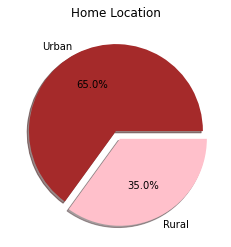

In [11]:
data1['Home Location'].value_counts().plot.pie(autopct="%1.1f%%",colors = ['brown','pink'],explode =[0,0.1],shadow = True,title='Home Location', label='')

##### Now we will normalize the values to percentages so that they are equal in terms of percentages
let's see the percentage of the Rural & Urban of our students:  


In [12]:
#Urban_and_Rural = oesr['Rural'].sum() + oesr['Urban'].sum()
#Urban_and_Rural
Rural_percent = data1['Rural'].sum() / Urban_and_Rural
Rural_percent * 100 

34.269119070667955

In [13]:
Urban_percent = data1['Urban'].sum() / Urban_and_Rural
Urban_percent * 100

65.73088092933205

we creat new DataForme that have the`Rural_percent` & `Study time (Hours)` columns.
`Rural_percent` is a column 

In [14]:
data_new = data1.copy()
#oesr1 = pd.DataFrame(oesr1, columns = ['Rural','Study time (Hours)'])
data_new['Rural_percent'] = data_new['Rural'] / data_new['Rural'].sum()*100
data_new['Urban_percent'] = data_new['Urban'] / data_new['Urban'].sum()*100
data_new

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education,Rural,Urban,Rural_percent,Urban_percent
0,Male,Urban,Under Graduate,18.0,11.0,Laptop,Middle Class,4.0,5.0,No,...,91-100,1.0,1.0,Practical,6.0,Average,0,1,0.000000,0.147275
1,Male,Urban,Under Graduate,19.0,7.0,Laptop,Middle Class,4.0,1.0,Yes,...,91-100,1.0,1.0,Theory,3.0,Bad,0,1,0.000000,0.147275
2,Male,Rural,Under Graduate,18.0,5.0,Laptop,Middle Class,5.0,2.0,No,...,71-80,1.0,1.0,Both,6.0,Bad,1,0,0.282486,0.000000
3,Male,Urban,Under Graduate,18.0,5.0,Laptop,Middle Class,4.0,4.0,Yes,...,91-100,1.0,2.0,Theory,4.0,Bad,0,1,0.000000,0.147275
4,Male,Rural,Under Graduate,18.0,5.0,Laptop,Middle Class,4.0,3.0,No,...,81-90,3.0,3.0,Both,6.0,Average,1,0,0.282486,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19.0,3.0,Mobile,Middle Class,6.0,5.0,Yes,...,91-100,4.0,4.0,Theory,8.0,Average,1,0,0.282486,0.000000
1029,Female,Rural,Under Graduate,20.0,6.0,Desktop,Middle Class,3.0,1.0,No,...,71-80,5.0,5.0,Theory,10.0,Average,1,0,0.282486,0.000000
1030,Female,Rural,Under Graduate,20.0,3.0,Mobile,Middle Class,3.0,2.0,No,...,71-80,2.0,2.0,Theory,6.0,Average,1,0,0.282486,0.000000
1031,Female,Rural,Under Graduate,19.0,6.0,Mobile,Middle Class,2.0,3.0,Yes,...,61-70,3.0,3.0,Both,6.0,Good,1,0,0.282486,0.000000


we new DataForme to adding the `Urban_percent` that contain the Urban students by percentage

In [15]:
data1

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education,Rural,Urban
0,Male,Urban,Under Graduate,18.0,11.0,Laptop,Middle Class,4.0,5.0,No,...,No,No,91-100,1.0,1.0,Practical,6.0,Average,0,1
1,Male,Urban,Under Graduate,19.0,7.0,Laptop,Middle Class,4.0,1.0,Yes,...,Yes,No,91-100,1.0,1.0,Theory,3.0,Bad,0,1
2,Male,Rural,Under Graduate,18.0,5.0,Laptop,Middle Class,5.0,2.0,No,...,Yes,No,71-80,1.0,1.0,Both,6.0,Bad,1,0
3,Male,Urban,Under Graduate,18.0,5.0,Laptop,Middle Class,4.0,4.0,Yes,...,No,yes,91-100,1.0,2.0,Theory,4.0,Bad,0,1
4,Male,Rural,Under Graduate,18.0,5.0,Laptop,Middle Class,4.0,3.0,No,...,Yes,yes,81-90,3.0,3.0,Both,6.0,Average,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19.0,3.0,Mobile,Middle Class,6.0,5.0,Yes,...,Yes,yes,91-100,4.0,4.0,Theory,8.0,Average,1,0
1029,Female,Rural,Under Graduate,20.0,6.0,Desktop,Middle Class,3.0,1.0,No,...,Yes,No,71-80,5.0,5.0,Theory,10.0,Average,1,0
1030,Female,Rural,Under Graduate,20.0,3.0,Mobile,Middle Class,3.0,2.0,No,...,Yes,yes,71-80,2.0,2.0,Theory,6.0,Average,1,0
1031,Female,Rural,Under Graduate,19.0,6.0,Mobile,Middle Class,2.0,3.0,Yes,...,No,No,61-70,3.0,3.0,Both,6.0,Good,1,0


we add to `oesr1` columns from the original DataSet. It's let us to use `groupby` on that DataFrmae 


In [16]:
data1['Study time (Hours)'] = data['Study time (Hours)']
data1['Sleep time (Hours)'] = data['Sleep time (Hours)']
data1['Time spent on social media (Hours)'] = data['Time spent on social media (Hours)']
data1['Number of Subjects'] = data['Number of Subjects']
data1['Internet facility in your locality'] = data['Internet facility in your locality']
data1['Family size'] = data['Family size']
data1['Age(Years)'] = data['Age(Years)']
#del oesr1['Study time (Hours)']
data1['Rural_percent'] = data_new['Rural'] / data_new['Rural'].sum()*100
data1['Urban_percent'] = data_new['Urban'] / data_new['Urban'].sum()*100
data1

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education,Rural,Urban,Rural_percent,Urban_percent
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,91-100,1.0,1.0,Practical,6.0,Average,0,1,0.000000,0.147275
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,91-100,1.0,1.0,Theory,3.0,Bad,0,1,0.000000,0.147275
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,71-80,1.0,1.0,Both,6.0,Bad,1,0,0.282486,0.000000
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,91-100,1.0,2.0,Theory,4.0,Bad,0,1,0.000000,0.147275
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,81-90,3.0,3.0,Both,6.0,Average,1,0,0.282486,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,91-100,4.0,4.0,Theory,8.0,Average,1,0,0.282486,0.000000
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,71-80,5.0,5.0,Theory,10.0,Average,1,0,0.282486,0.000000
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,71-80,2.0,2.0,Theory,6.0,Average,1,0,0.282486,0.000000
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,61-70,3.0,3.0,Both,6.0,Good,1,0,0.282486,0.000000


#### Now we would like to compare the number of hours and courses between the rural and the urban. It can be seen that the students in the rural area study more hours and crashes compared to the urban students.

<AxesSubplot:xlabel='Study time (Hours)'>

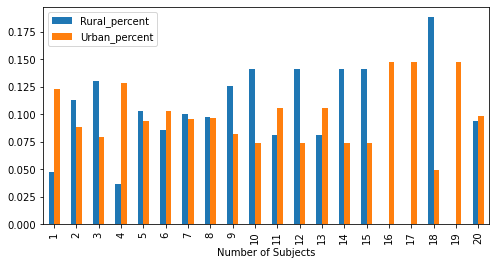

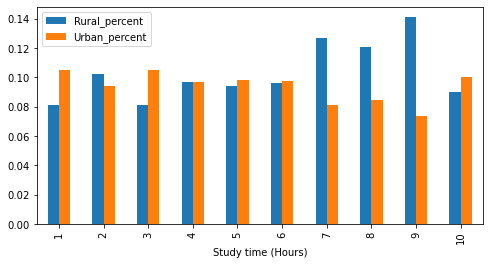

In [17]:
data1.groupby(['Number of Subjects'])[['Rural_percent','Urban_percent']].mean().plot(kind = 'bar' ,figsize = (8,4))
data1.groupby(['Study time (Hours)'])[['Rural_percent','Urban_percent']].mean().plot(kind = 'bar' ,figsize = (8,4))

<AxesSubplot:xlabel='Internet facility in your locality'>

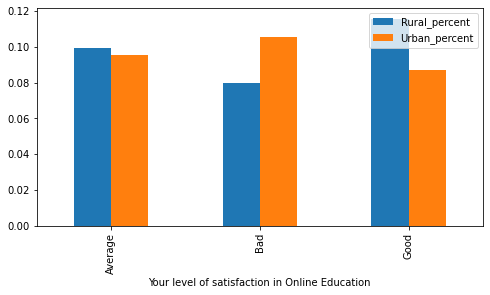

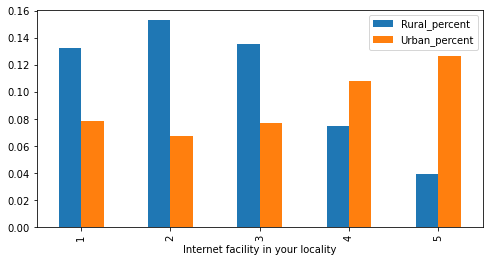

In [18]:
data1.groupby(['Your level of satisfaction in Online Education'])[['Rural_percent','Urban_percent']].mean().plot(kind = 'bar' ,figsize = (8,4))
data1.groupby(['Internet facility in your locality'])[['Rural_percent','Urban_percent']].mean().plot(kind = 'bar' ,figsize = (8,4))

#### It can be seen that although the quality of the internet in the rural areas is on average low compared to the level in the cities, it can be seen that the level of satisfaction with online learning of the students in the rural areas is higher than the students in the urban areas.


![Alt Text](https://www.myaustria.co.il/wp-content/uploads/2016/01/Altausee.jpg )

![Alt Text](https://yogevsharvit.files.wordpress.com/2016/05/d7a7d7a8d799d799d7aa-d792d7aa.jpg?w=768) 

# observation 2:

<AxesSubplot:>

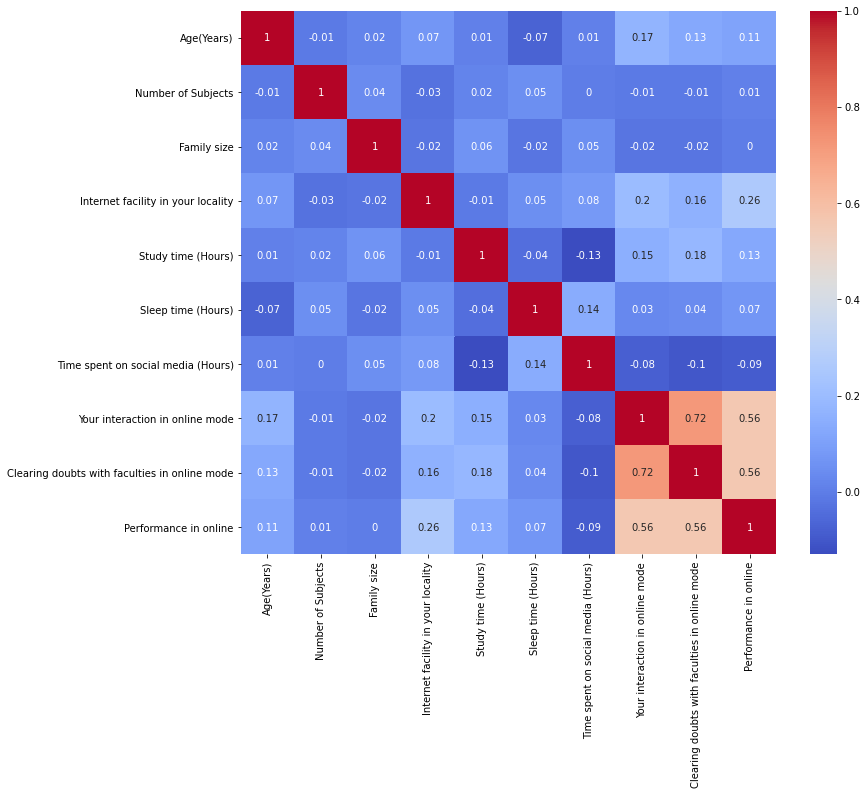

In [19]:
data_2 = data.corr().round(2)
data_2
plt.figure(figsize=(12,10))
sns.heatmap(data = data_2,cmap='coolwarm', annot=True)

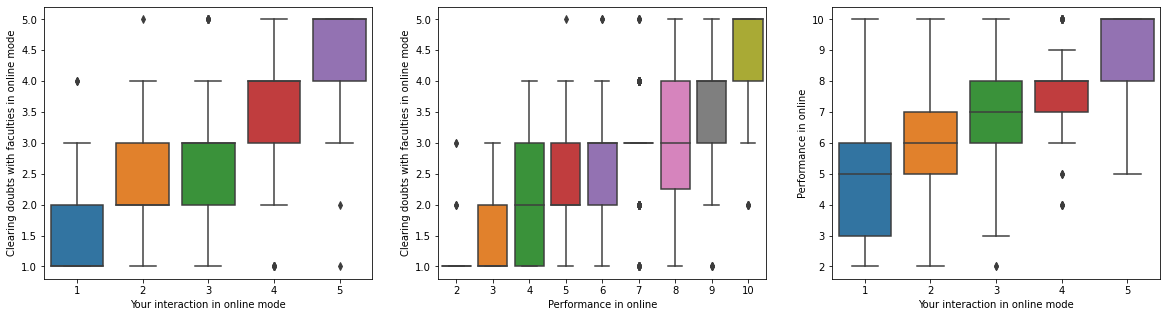

In [20]:
#plt.figure(figsize=(5.5,4))
fig, axes = plt.subplots(figsize=(20,5), ncols=3)
sns.boxplot(ax = axes[0],x='Your interaction in online mode', y='Clearing doubts with faculties in online mode', data=data);
sns.boxplot(ax =axes[1],x='Performance in online', y='Clearing doubts with faculties in online mode', data=data);
sns.boxplot(ax = axes[2],x='Your interaction in online mode', y='Performance in online', data=data);

In [21]:
data1.groupby(['Average marks scored before pandemic in traditional classroom','Engaged in group studies?'])[['Engaged in group studies?']].count()

Engaged in group studies?
Average marks scored before pandemic in traditi... Engaged in group studies?                           
0-10                                               No                                                 1
11-20                                              No                                                 2
                                                   yes                                                4
21-30                                              No                                                 1
                                                   yes                                                6
31-40                                              No                                                 3
                                                   yes                                                7
41-50                                              No                                                16
                                                   yes                                                6
51-60                                              No                                                30
                                                   yes                                               19
61-70                                              No                                                50
                                                   yes                                               61
71-80                                              No                                               175
                                                   yes                                              116
81-90                                              No                                               187
                                                   yes                                              121
91-100                                             No                                                98
                                                   yes                                               43

<function matplotlib.pyplot.show(close=None, block=None)>

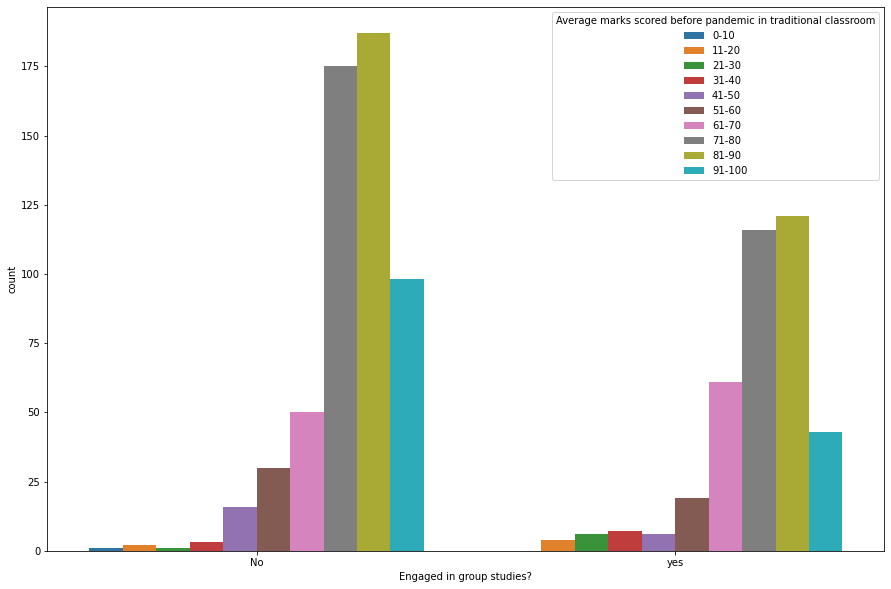

In [22]:
 plt.subplots(figsize=(15,10))
sns.countplot(x='Engaged in group studies?', hue='Average marks scored before pandemic in traditional classroom',hue_order =['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'], data=data1)
plt.show

#### It can be concluded from these data that online learning is effective for students who are active during the lectures and study alone.

# observation 3:
### Socioeconomic status

### The differences between the poor, the rich and the middle class

as we did before - we transfer from `str` to `int` by `get_dummies` 

In [23]:
Economic_status = pd.get_dummies(data = data['Economic status'])
Economic_status

,Middle Class,Poor,Rich
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1028,1,0,0
1029,1,0,0
1030,1,0,0
1031,1,0,0


Economic_status[['Middle Class','Poor','Rich']].sum()### show the data

In [24]:
Economic_status[['Middle Class','Poor','Rich']].sum()

Middle Class    954
Poor             49
Rich             30
dtype: int64

<AxesSubplot:>

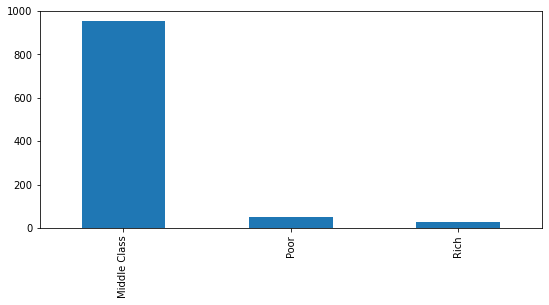

In [25]:
Economic_status[['Middle Class','Poor','Rich']].sum().plot(kind = 'bar' ,figsize = (9,4))

we traverse the data to percents 

In [26]:
Economic_status['Poor_percent'] = Economic_status['Poor'] / Economic_status['Poor'].sum()*100
Economic_status['Rich_percent'] = Economic_status['Rich'] / Economic_status['Rich'].sum()*100
Economic_status['Middle__Class_percent'] = Economic_status['Middle Class'] / Economic_status['Middle Class'].sum()*100
Economic_status

,Middle Class,Poor,Rich,Poor_percent,Rich_percent,Middle__Class_percent
0,1,0,0,0.0,0.0,0.104822
1,1,0,0,0.0,0.0,0.104822
2,1,0,0,0.0,0.0,0.104822
3,1,0,0,0.0,0.0,0.104822
4,1,0,0,0.0,0.0,0.104822
...,...,...,...,...,...,...
1028,1,0,0,0.0,0.0,0.104822
1029,1,0,0,0.0,0.0,0.104822
1030,1,0,0,0.0,0.0,0.104822
1031,1,0,0,0.0,0.0,0.104822


In [27]:
data1 = pd.concat([data1,Economic_status],axis = 1)

<AxesSubplot:xlabel='Family size'>

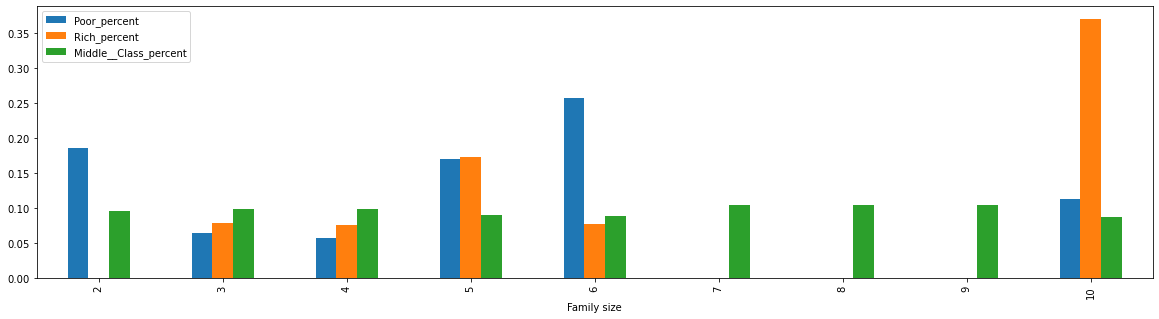

In [28]:
data1.groupby(['Family size'])[['Poor_percent','Rich_percent','Middle__Class_percent']].mean().plot(kind = 'bar' ,figsize = (20,5))

as we can see most of the poor familys are small (2-6), the unexpected result is the rich famileis have small of very big families !

<AxesSubplot:xlabel='Sleep time (Hours)'>

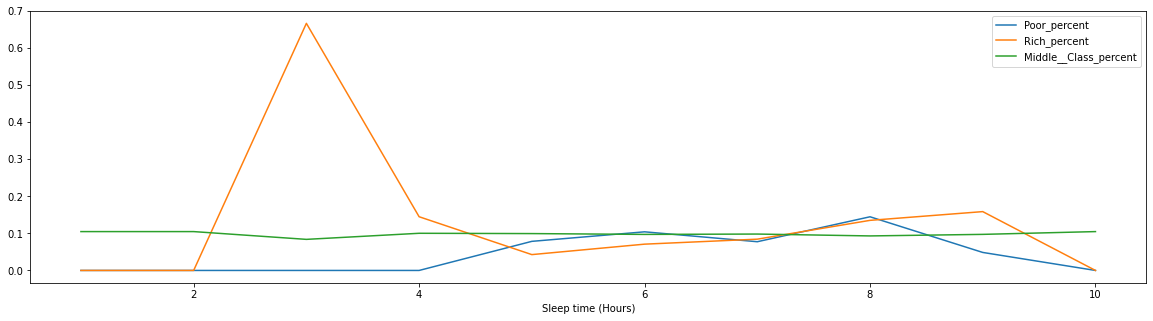

In [29]:
data1.groupby(['Sleep time (Hours)'])[['Poor_percent','Rich_percent','Middle__Class_percent']].mean().plot(kind = 'line' ,figsize = (20,5))

from this graph we see that the rich sleep less, they sleep 2 to 4 hours a day while most of the poors sleep more then 4 hours

<AxesSubplot:xlabel='Time spent on social media (Hours)'>

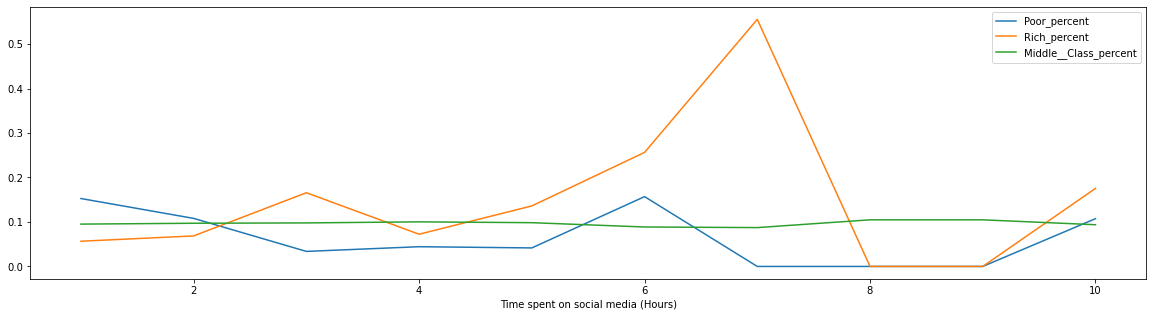

In [30]:
data1.groupby(['Time spent on social media (Hours)'])[['Poor_percent','Rich_percent','Middle__Class_percent']].mean().plot(kind = 'line' ,figsize = (20,5))

the rich are more in social media more then the poor

<AxesSubplot:xlabel='Number of Subjects'>

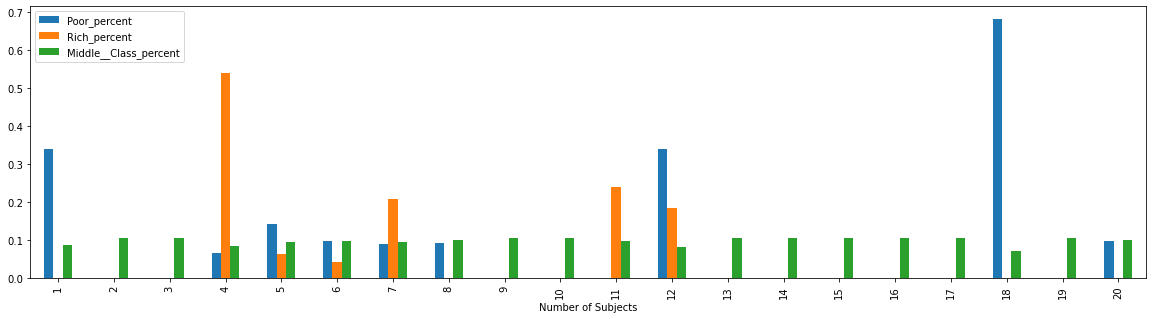

In [31]:
data1.groupby(['Number of Subjects'])[['Poor_percent','Rich_percent','Middle__Class_percent']].mean().plot(kind = 'bar' ,figsize = (20,5))

most of the poor take alot of courses. meanwhile the rich are take small number of courses. 

<AxesSubplot:xlabel='Internet facility in your locality'>

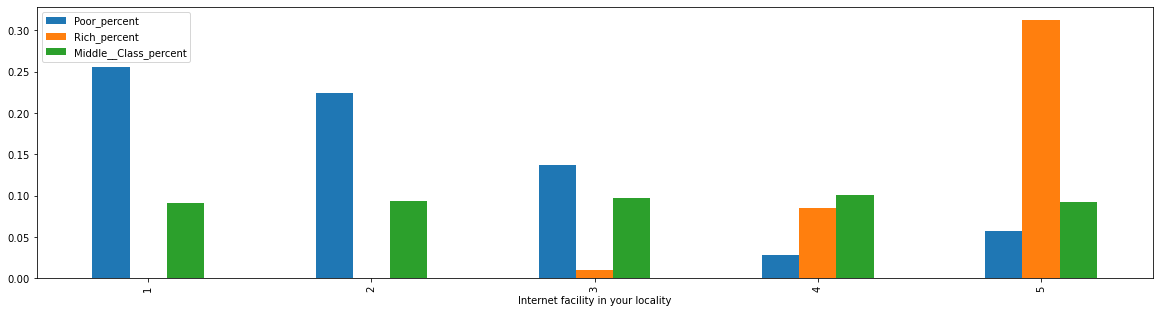

In [32]:
data1.groupby(['Internet facility in your locality'])[['Poor_percent','Rich_percent','Middle__Class_percent']].mean().plot(kind = 'bar' ,figsize = (20,5))

##### the rich have better internet facility in your locality then the poor that have the worst internet facility in your locality

<AxesSubplot:>

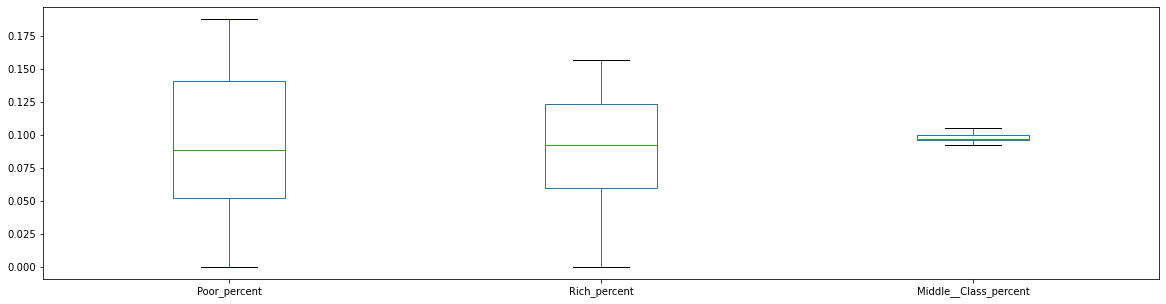

In [33]:
data1.groupby(['Study time (Hours)'])[['Poor_percent','Rich_percent','Middle__Class_percent']].mean().plot(kind = 'box' ,figsize = (20,5))

##### the poor learn more then the rich, alot more. why? it can be because the poor take more courses, it can be because the internet in there house is bad and the need more time to have the same cours (due to internet delays). but we think it's because the have more motivation and more pressure to succeed. In the otherhand the rich are study less. why? becuae the more in the social media, they take less courses, have a better internet conction and have a bigger family with whom they spend time.

### In order to establish our data, we created an anonymous survey in which we asked the students who study with us overlapping and new questions related to our data:

In [34]:
seker= 'https://raw.githubusercontent.com/IHoshen/Data-analysis-project/main/new%20seker%20(3).csv'
data_seker=pd.read_csv(seker)
data_seker.head()

,Do you take an attention and concentration pill?,Do you work at the same time as you study?,Do you feel that your grades have changed for the better as a result of distance learning?,Did you experience internet communication problems during distance learning that affected viewing?,Did you watch the recordings during the semester?,Do you think the recordings are effective?,Do you study in groups?,Do you have a quiet study area at home?,Do you have any hobbies that you tend to maintain in your spare time?,Do you usually log into social networks during the remote class?,Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers)
0,no,yes,yes,3,yes,yes,yes,no,yes,1,not relevnt
1,no,no,no,3,yes,yes,yes,yes,yes,2,not relevnt
2,yes,yes,yes,1,yes,yes,no,yes,nothing,2,yes
3,no,no,no,5,no,no,no,yes,nothing,1,not relevnt
4,no,no,yes,2,yes,yes,no,yes,yes,2,not relevnt


<AxesSubplot:title={'center':'Do you take an attention and concentration pill?'}>

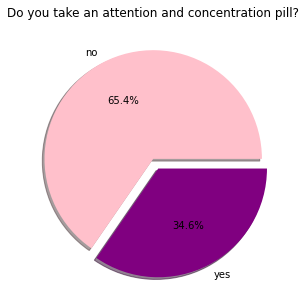

In [35]:
plt.figure(figsize =(20,5))
data_seker['Do you take an attention and concentration pill?'].value_counts().plot.pie(autopct="%1.1f%%",y='value',explode =[0,0.1],colors = ['pink','purple'], figsize=(5,5),title='Do you take an attention and concentration pill?', label='', shadow= True)

<AxesSubplot:title={'center':'Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers'}>

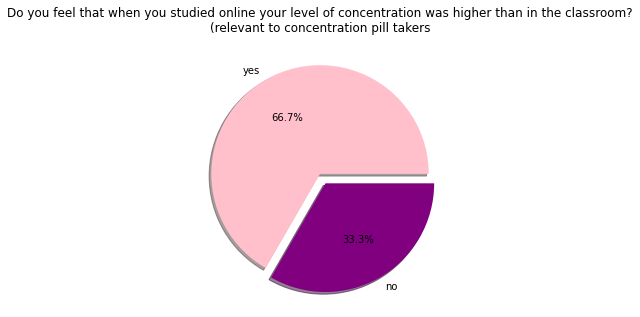

In [36]:
seker_pill = data_seker[['Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers)']].fillna('not relevnt')
seker_pill = seker_pill.dropna(subset = ['Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers)'])
seker_pill.drop(seker_pill.index[seker_pill['Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers)'] == 'not relevnt'], inplace = True)
seker_pill['Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers)'].value_counts().plot.pie(autopct="%1.1f%%",y='value',explode =[0,0.1],colors = ['pink','purple'], figsize=(5, 5), label='',title='Do you feel that when you studied online your level of concentration was higher than in the classroom?\n(relevant to concentration pill takers', shadow= True)

#### Now it can be concluded from the charts that those who take a pill for attention and concentration, their level of concentration is higher when they are studying online and also testified that their grades have increased.



![Alt Text](https://www.awake.co.il/wp-content/uploads/2016/12/%D7%90%D7%9C%D7%99-%D7%A7%D7%A8%D7%A1%D7%A0%D7%99%D7%A5-%D7%94%D7%A4%D7%A8%D7%A2%D7%95%D7%AA-%D7%A7%D7%A9%D7%91-%D7%95%D7%A8%D7%99%D7%9B%D7%95%D7%96.jpg)

In [37]:
data_seker['Do you work at the same time as you study?'].value_counts().to_frame()

,Do you work at the same time as you study?
yes,42
no,36


In [38]:
data_seker['Do you think the recordings are effective?'].value_counts().to_frame()

,Do you think the recordings are effective?
yes,69
no,9


In [39]:
data_seker['Did you watch the recordings during the semester?'].value_counts().to_frame()

,Did you watch the recordings during the semester?
yes,65
no,13


### We found from the survey that an absolute majority prefers to use recordings and that they were found to be effective.

# Final conclusions:

### In conclusion, you can see that studying online is a very effective way. It helps people who live far from the educational institution, those who need to work at the same time as their degree in order to finance it. In addition, it allows freeing up time for personal pursuits.

### The recordings are a very effective tool for most students, stopping them can harm disadvantaged populations. In addition, it can be seen that the recordings have a positive effect on the grades among the students. In addition, people with attention and concentration reported a higher ability to concentrate when watching the recordings.